In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_av = pd.read_csv('2020-citibike-tripdata/9_September/202009-citibike-tripdata_1.csv',\
                 usecols=['starttime','start station id','stoptime','end station id','bikeid'],\
                 parse_dates=['starttime','stoptime'])

In [3]:
dfrebal=pd.read_parquet('202009-citibike-reblance.parquet')

In [4]:
dfrebal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15512 entries, 0 to 15511
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   starttime         15512 non-null  datetime64[ns]
 1   start station id  15512 non-null  int64         
 2   stoptime          15512 non-null  datetime64[ns]
 3   end station id    15512 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 484.9 KB


In [5]:
df = pd.concat([df_av,dfrebal])
df.reset_index(drop=True, inplace=True)
df

,starttime,stoptime,start station id,end station id,bikeid
0,2020-09-01 00:00:01.043,2020-09-01 01:10:26.635,3508,116,44317.0
1,2020-09-01 00:00:04.832,2020-09-01 00:31:13.765,3621,3094,37793.0
2,2020-09-01 00:00:06.899,2020-09-01 00:18:24.226,3492,3959,41438.0
3,2020-09-01 00:00:07.744,2020-09-01 00:24:41.180,3946,4002,35860.0
4,2020-09-01 00:00:12.202,2020-09-01 00:20:05.547,3081,3048,26396.0
...,...,...,...,...,...
1015507,2020-09-10 19:40:14.353,2020-09-11 07:05:11.424,315,3919,NaN
1015508,2020-09-09 14:23:29.105,2020-09-09 14:55:59.605,499,3292,NaN
1015509,2020-09-11 20:33:14.241,2020-09-12 11:55:44.650,3604,3364,NaN
1015510,2020-09-08 20:09:28.496,2020-09-09 07:09:10.916,3161,3170,NaN


Split each trip (with start and end times and stations) from one row into two with a new column act that indicates the action that took place by creating two dataframes:

dfs (pickups) with starttime, start station id and act set to -1
dfe (drop-offs) withstoptime, end station id and act set to +1

In [6]:
dfs=df[['starttime','start station id']].assign(act=-1)

In [7]:
dfe=df[['stoptime','end station id']].assign(act=1)

Rename the columns to be the same in both dataframes. Then create new dataframe dfse by concatentating start and end rows.

In [8]:
dfs.columns=['docktime','stationid','act']
dfe.columns=['docktime','stationid','act']
dfse=pd.concat([dfs,dfe])

In [26]:
dfse.head(20)

,docktime,stationid,act
0,2020-09-01 00:00:01.043,3508,-1
1,2020-09-01 00:00:04.832,3621,-1
2,2020-09-01 00:00:06.899,3492,-1
3,2020-09-01 00:00:07.744,3946,-1
4,2020-09-01 00:00:12.202,3081,-1
5,2020-09-01 00:00:12.866,3738,-1
6,2020-09-01 00:00:15.842,501,-1
7,2020-09-01 00:00:28.047,3737,-1
8,2020-09-01 00:00:29.581,4024,-1
9,2020-09-01 00:00:34.560,3100,-1


In [10]:
dfse.sort_values(by=['docktime'], inplace=True) 
dfse.reset_index(drop=True, inplace=True) 
dfse.head(100)

,docktime,stationid,act
0,2020-09-01 00:00:01.043,3508,-1
1,2020-09-01 00:00:04.832,3621,-1
2,2020-09-01 00:00:06.899,3492,-1
3,2020-09-01 00:00:07.744,3946,-1
4,2020-09-01 00:00:12.202,3081,-1
...,...,...,...
95,2020-09-01 00:05:44.807,3967,1
96,2020-09-01 00:05:45.601,4045,1
97,2020-09-01 00:05:51.011,3101,-1
98,2020-09-01 00:05:51.983,530,1


In [11]:
dfstations = \
  pd.read_csv('2020-citibike-tripdata/9_September/202009-citibike-tripdata_1.csv',\
  usecols=['start station id','start station name']).\
  drop_duplicates()                
dfstations.columns=['stationid','station name']
dfstations.set_index('stationid' ,  inplace=True)

In [12]:
dfstations

,station name
stationid,
3508,St Nicholas Ave & Manhattan Ave
3621,27 Ave & 9 St
3492,E 118 St & Park Ave
3946,St Nicholas Ave & W 137 St
3081,Graham Ave & Grand St
...,...
4147,E 163 St & Tiffany St
4166,River Ave & E 153 St
4105,Concourse Village West & E 156 St


Analysis for One Station:
Create datafame for all bikes in/out to one station
Get the station id for one station

In [13]:
station = 'W 31 St & 7 Ave'
sid = dfstations.loc[dfstations['station name']==station].index[0]

Create new dataframe dfstation with rows for one station

In [14]:
dfstation = dfse.loc[(dfse.stationid==sid) ]
dfstation.reset_index(drop=True, inplace=True)

In [15]:
dfstation = dfstation.assign(cnt = dfstation.act.cumsum())
dfstation.head(10)

,docktime,stationid,act,cnt
0,2020-09-01 00:42:43.779,379,1,1
1,2020-09-01 01:17:12.448,379,1,2
2,2020-09-01 04:42:54.568,379,1,3
3,2020-09-01 05:17:08.670,379,-1,2
4,2020-09-01 05:37:29.281,379,1,3
5,2020-09-01 06:03:24.066,379,1,4
6,2020-09-01 06:08:22.417,379,-1,3
7,2020-09-01 06:09:02.870,379,1,4
8,2020-09-01 06:10:53.029,379,-1,3
9,2020-09-01 06:16:38.907,379,-1,2


Determine likely starting number of bikes for this station
Calculate lowest value for a running sum of act which will be a negative number.
Add its absolute value to first value for act to get starting bike count

In [16]:
dfstation.at[0, 'act'] =+ abs(dfstation.act.cumsum().min()) 

In [17]:
dfstation = dfstation.assign(cnt = dfstation.act.cumsum())
dfstation.head(10)

,docktime,stationid,act,cnt
0,2020-09-01 00:42:43.779,379,25,25
1,2020-09-01 01:17:12.448,379,1,26
2,2020-09-01 04:42:54.568,379,1,27
3,2020-09-01 05:17:08.670,379,-1,26
4,2020-09-01 05:37:29.281,379,1,27
5,2020-09-01 06:03:24.066,379,1,28
6,2020-09-01 06:08:22.417,379,-1,27
7,2020-09-01 06:09:02.870,379,1,28
8,2020-09-01 06:10:53.029,379,-1,27
9,2020-09-01 06:16:38.907,379,-1,26


Plot availabilty for the month

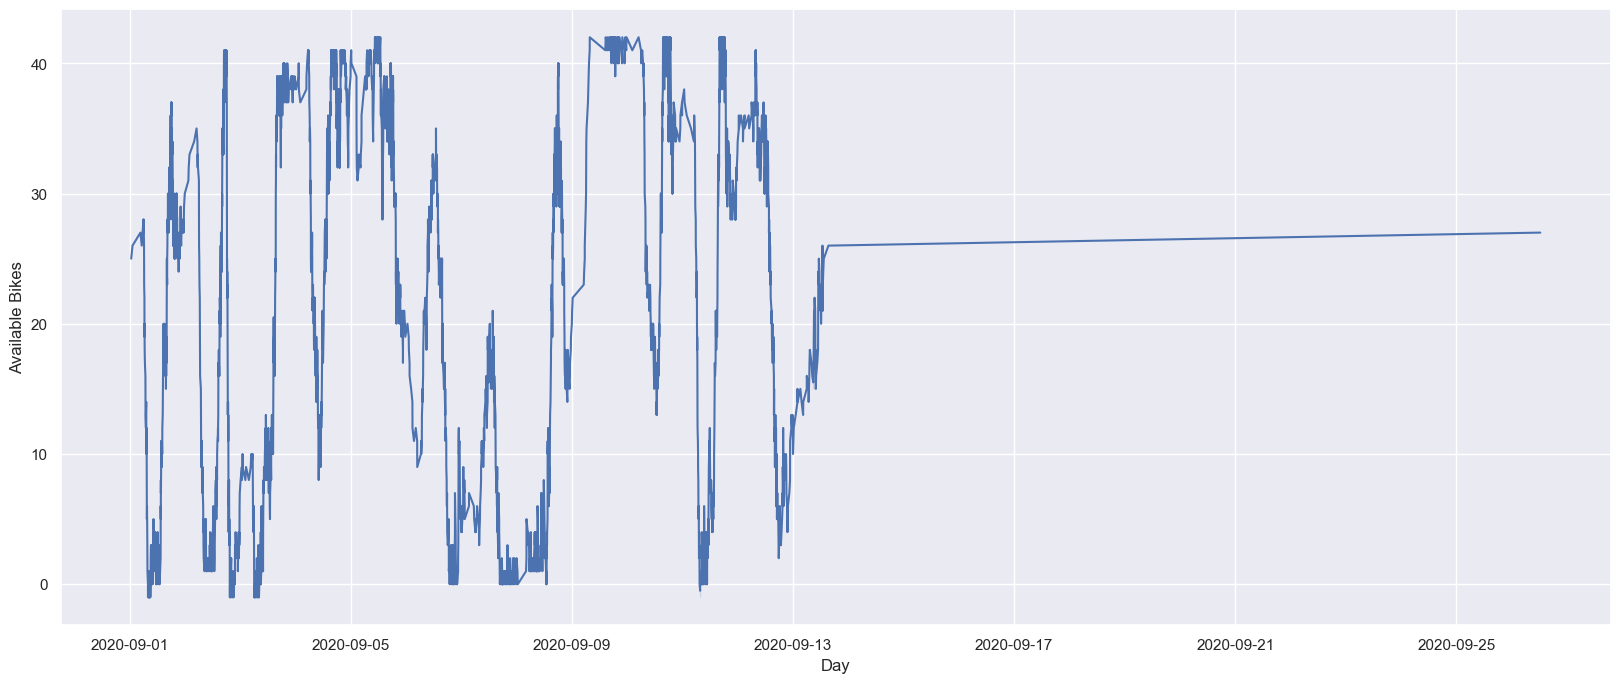

In [18]:
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=dfstation , x='docktime', y='cnt' ) 
ax.set_xlabel('Day') 
ax.set_ylabel('Available Bikes') ;

Plot availabilty for one day

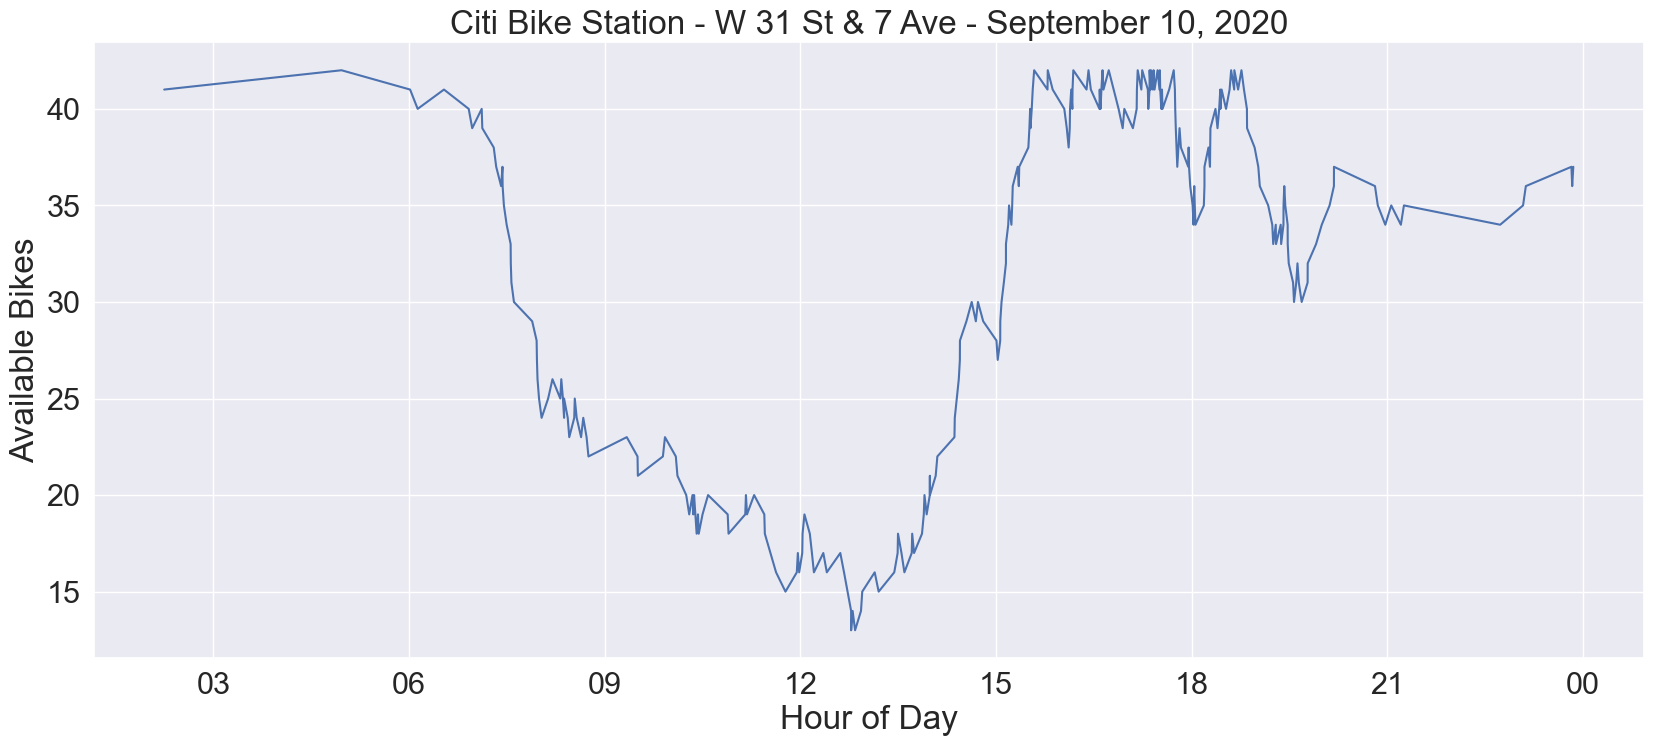

In [21]:
from datetime import timedelta
from matplotlib.dates import DateFormatter

sns.set(font_scale = 2)
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=dfstation.loc[dfstation.docktime.dt.day == 10] , x='docktime', y='cnt' ) 
ax.set_ylabel('Available Bikes')
ax.set_xlabel('Hour of Day') 
ax.set_title('Citi Bike Station - ' + station +' - September 10, 2020')
ax.xaxis.set_major_formatter(DateFormatter("%H")) ;

Create function to plot one station

In [24]:
def availability (station,day):
    # inputs: station name, day 
    # requires: dfstations, dfse 
    sid = dfstations.loc[dfstations['station name']==station].index[0] # lookup station id 
    dfstation = dfse.loc[(dfse.stationid==sid) ] # create dataframe for a specified station 
    dfstation.reset_index(drop=True, inplace=True)
    dfstation = dfstation.assign(cnt = dfstation.act.cumsum()) # get running total 
    dfstation.at[0, 'act'] =+ abs(dfstation.act.cumsum().min()) # find sub-zero bike count
    dfstation = dfstation.assign(cnt = dfstation.act.cumsum()) # recalculate running total 
    
    # Create chart 
    sns.set(font_scale = 2)
    plt.figure(figsize=(20,8))
    ax=sns.lineplot(data=dfstation.loc[dfstation.docktime.dt.day == day] , x='docktime', y='cnt' ) 
    ax.set_ylabel('Available Bikes')
    ax.set_xlabel('Hour of Day') 
    ax.set_title('Citi Bike Station - ' + station +' - September ' + str(day))
    ax.xaxis.set_major_formatter(DateFormatter("%H")) ;
    

In [22]:
list(dfstations['station name'])

['St Nicholas Ave & Manhattan Ave',
 '27 Ave & 9 St',
 'E 118 St & Park Ave',
 'St Nicholas Ave & W 137 St',
 'Graham Ave & Grand St',
 'Delancey St & Eldridge St',
 'FDR Drive & E 35 St',
 'Stanton St & Norfolk St',
 'Macombs Pl & W 152 St',
 'Nassau Ave & Newell St',
 'Bedford Ave & S 9 St',
 'Avenue D & E 3 St',
 'Madison St & Seneca Ave',
 'Park Ave & Marcus Garvey Blvd',
 'Schermerhorn St & Court St',
 'E 102 St & Park Ave',
 'W 44 St & 5 Ave',
 '4 Ave & E 12 St',
 'DeKalb Ave & Vanderbilt Ave',
 '1 Ave & E 44 St',
 'Montague St & Clinton St',
 'Menahan St & Wyckoff Ave',
 'Broadway & W 41 St',
 'W 70 St & Amsterdam Ave',
 '12 Ave & W 40 St',
 'Cooper Square & Astor Pl',
 'Pleasant Ave & E 120 St',
 'Monroe St & Tompkins Ave',
 'Riverside Blvd & W 67 St',
 'E 33 St & 1 Ave',
 'Sands St Gate',
 '31 St & Newtown Ave',
 'E 19 St & 3 Ave',
 'Stanton St & Mangin St',
 'E 47 St & 2 Ave',
 'Grand St & Elizabeth St',
 'E 27 St & 1 Ave',
 'E 39 St & 2 Ave',
 'Rockaway Ave & Bainbridge St',

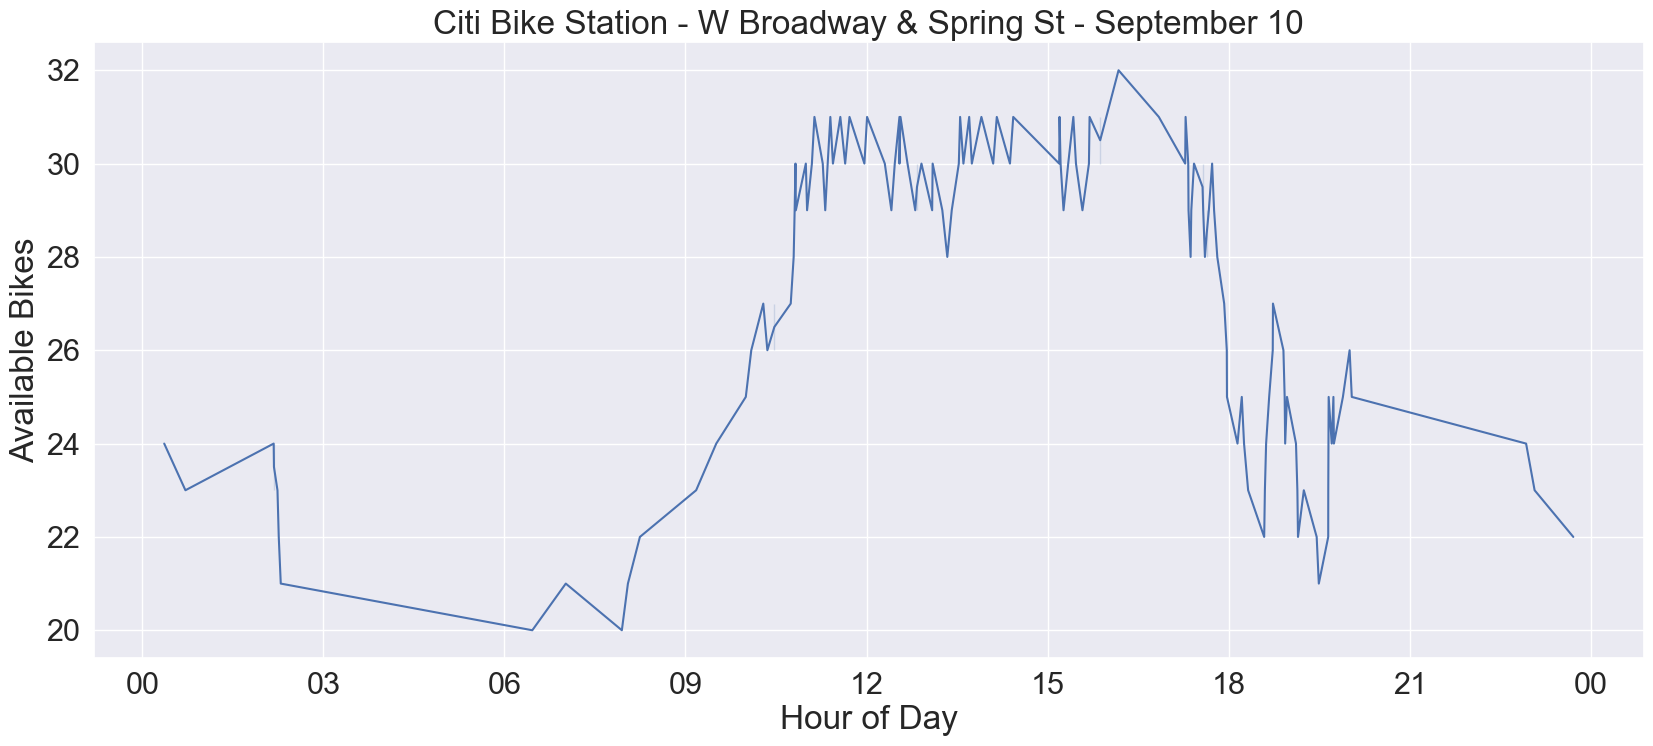

In [25]:
availability('W Broadway & Spring St',10)